# Modelling Gravity

*(Background in math and physics would be helpful)*

Given how most astronomical systems are far beyond our reach, we often need to turn to models and simulations in order to verify our predictions about theories. This simulation is a simplified version of the ones used to predict the long-term behaviour of comets and asteroids, which may pose potential hazards to earth.

**Problem Statement:** Can we predict the orbital period of planets in the solar system?

## Theory

Gravity is one of the four fundamental forces in the universe. Gravity (in simple terms) is a purely attractive force, determined by the mass of the two objects and the distance between them. For two point-masses, the gravitational force between them is given by

$$
F_G = \frac{GMm}{r^2}
$$

Where $F_G$ is the force, $G=6.67\times 10^{-11}$ m$^{3}$kg$^{-1}$s$^{-1}$ is the gravitational constant, $M,m$ are the masses of the two bodies, and $r$ is the distance between them. 


However, this simplistic (scalar) formula does not account for the direction of the force. When modelling gravitational bodies, we will have to consider the direction of the force as well. We can rewrite the formula as a vector, such that the force body 1 experiences due to body 2 is

\begin{align}
\vec{F}_G 
&= \frac{GMm}{|r^2|}\cdot \hat{r} \\
&= \stackrel{\mathrm{Magnitude}}{\frac{GMm}{|\vec{r}_2 - \vec{r}_1|^2}}\cdot \stackrel{\mathrm{Unit\ Vector}}{\frac{(\vec{r}_2 - \vec{r}_1)}{|\vec{r}_2 - \vec{r}_1|}}
\end{align}

Where we can write the distance between the masses as the magnitude of the difference in their positions ($\vec{r}_1, \vec{r}_2$ respectively), multiplied by a unit vector for direction of the force.

When working in higher dimensions, one way we can simplify this is to decompose this into the three cartesian directions ($x,y,z$) and work them out separately.

E.g., consider the force in $x$, which will cause acceleration in the $x$ direction, and changes in the $x$ velocity and $x$ position. Note that the magnitude of the force still depends on the total (pythagorean) distance between the bodies.



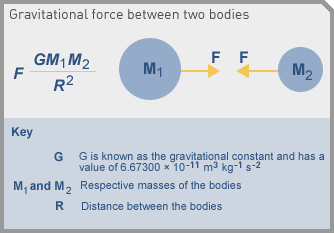

## Limitations: Three-body Problem

We can see that the formula for gravity between two bodies is relatively simple. However, when we consider more bodies, the system becomes much more complicated. This is known as the three-body problem. The three-body problem cannot be solved exactly and often requires numerical simulations to model. 

The number of interactions to consider grows with the number of bodies considered. For two bodies, there is only one interaction between them. For three bodies, there are three interactions pairwise between them. For four bodies, the number of pairwise interactions become 6. The interactions scale roughly to the square of the number of bodies. As such, many body systems are often difficult to model computationally.

## Numerical Integration

The idea behind numerical integration is to take small steps in time ($\delta t$) and determine the path the object will follow. This is different from reality as time flows smoothly and continuously. As such, we can deduce that the smaller time steps we take, the closer we get to a continuous flow of time, and the more accurate the simulation (At the cost of computational power).

To do numerical integration, we must first understand (1) position $r$, (2) velocity $v$, and (3) acceleration $a$. In physics, velocity is defined as change in position over time $t$, and acceleration is change in velocity over time $t$. As simple way to express this is

$$
v \equiv \frac{\mathrm{d}r}{\mathrm{d}t} \approx \frac{r_f - r_i}{t} \\
a \equiv \frac{\mathrm{d}v}{\mathrm{d}t} \approx \frac{v_f - v_i}{t}
$$

The time differentials ($\mathrm{d}/\mathrm{d}t$) indicate a change in time with respect to a variable. We can see that it is essentially taking the difference between the final and inital values (subscript $f$ and $i$), and dividing by the time difference $t$.

We can use this equation to find the final velocity/position, given that we know the acceleration/velocity ($v$), initial velocity/position ($r_i$), and the time taken. By choosing a small time step $\delta t$, we can find the position at the next instance in time ($r_f$):

$$
v = \frac{r_f - r_i}{\delta t} \\
r_f = r_i + v\cdot\delta t
$$

Likewise for velocity

$$
a = \frac{v_f - v_i}{\delta t} \\
v_f = v_i + a\cdot\delta t
$$

Thus, we can sequentially determine the velocity and position of an object step-by-step, given that we know the acceleration (proportional to force, $F=ma$) on the object. Extending this to multiple dimensions simply requires us to consider each cardinal direction (x, y, z) separately. 


## Simulation Model

We will be considering a simple model to begin with. We will be making a few simplifications to the model
1.	We consider a two-dimensional model ($x,y$)\
    a.	This can easily be extended into three-dimensions if required\
    b.	Two dimensional simulation may not hold when considering chaotic wandering of multiple bodies 
2.	Gravitation between planets is ignored\
    a.	Gravity is a relatively weak force, and so planet-planet interactions can be ignored if we are not investigating such effects\
    b.	When doing three-body modelling, you cannot make this assumption (e.g., orbital resonances)
3.	The sun is immovable\
    a.	This again is a consequence that the force exerted on the sun by planets is negligible\
    b.	Does not hold if we want to consider more massive bodies (E.g., binary star systems)
4.	Point-mass\
    a.	All bodies are treated as point-masses, i.e., their mass is all concentrated into a single point, and they do not have a radius\
    b.	This might lead to “slingshot” events when two bodies approach each other two closely
5.	General Relativity effects are ignored\
    a.	“Relativistic mass/momentum” is ignored\
    b.	Frame-dragging by massive rotating bodies is ignored


# Simulation

## Initial Setting Up


**Problem Statement**: Can we predict the orbital period of planets in the solar system?

We will begin by trying out Mercury and the sun.

First, we have to import the libraries required. We will need

1. *matplotlib.pyplot* for plotting our results
2. *numpy* for making the math simplier in arrays

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Next, let's declare the variables that we want to keep constant. 

1. Gravitational Constant $G$
2. Time step $\delta t$
3. Total run time $t$

For now, we use a time step of $60$s and a total run time of $88$ days (Roughly the orbital period of mercury)

In [2]:
G = 6.67E-11                # Gravitational Constant
time_step = 60              # Numerical integration time step size (s)
run_time = 60*60*24*88      # Total run time: number of steps = run time/step size (s)

## Making the Masses

Consider what variables we need for each body:

1. Position ($r_x, r_y$)
2. Velocity ($v_x, v_y$)
3. Acceleration ($a_x, a_y$)
4. Mass ($m$)

For the variables that involve multiple coordinates, we can use numpy's array to hold both numbers at once. This will essentially be a vector. We can then store all of these variables into a list, for each body. For example, 

In [3]:
pos = np.array([0,0])
vel = np.array([1,0])
accel = np.array([0,0])
mass = 1

planet = [pos, vel, accel, mass]

And so when we want the different variables, we can just find them from the list:

In [4]:
print("The position is")
print(planet[0])

print("The mass is")
print(planet[3])

The position is
[0 0]
The mass is
1


and so on. 

Let's model the orbit of Mercury and the sun. Googling, we find that the sun has the mass of $M_s = 1989\times10^{27}$ kg. We can initialise the sun as the centre of the system, position = $(0,0)$, and is essentially so heavy that Mercury doesn't move the sun, velocity = $(0,0)$. Acceleration will be later computed by the equation for the force shown above. For now, we also set it to $(0,0)$


In [5]:
sun_pos = np.array([0,0])
sun_vel = np.array([0,0])
sun_accel = np.array([0,0])
sun_mass = 1989E27

sun = [sun_pos, sun_vel, sun_accel, sun_mass]


Next, Mercury has the mass of roughly $M_m = 33\times10^{22}$kg. At its furthest point from the sun, $r_m = 69.8\times10^6$ km, it has the minimum orbital velocity $v_m = 38.6$ km/s. [ https://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html ]

Note that we could have equivalently used the closest approach to the sun, and the maximum velocity.

 We can start Mercury along the $x$-axis, such that:

In [6]:
merc_pos = np.array([69.8E9,0])                         # Starts along the x-axis
merc_vel = np.array([0,38.6E3])                         # And velocity is tangential, pointing in the y-axis
merc_accel = np.array([0,0])                            # Acceleration is again left empty
merc_mass = 33E22

merc = [merc_pos, merc_vel, merc_accel, merc_mass]

## Moving the bodies

Now we want to move the bodies. First, we need a function to determine the force on each body for us. We want it to take in two masses as inputs, and output the force. We will treat the sun as essentially immovable, and so we will only need to force on Mercury.

To find the distance between the two masses, we will use the *np.linalg.norm()* function. What this essentially does is find the pythagorean distance of the numpy array (vector) inside it.

E.g., 

In [7]:
distance = np.linalg.norm( np.array((3,4)) )
print(distance)

distance2 = np.sqrt( 3**2 + 4**2 )
print(distance2)

5.0
5.0


And so, we can write the force as

In [8]:
def force(body1, body2):
    # We will treat body1 as immovable

    distance = np.linalg.norm(body1[0] - body2[0])
    unit_vector = (body1[0] - body2[0]) / distance

    F = G*body1[3]*body2[3] / distance**2 * unit_vector

    return F

Putting this to the test, we find that there is a force in the direction towards the sun (-$x$ direction)

In [9]:
force(sun, merc)

array([-8.98594408e+21,  0.00000000e+00])

Now, we need another function, to move the planets numerically after finding the force. We can do this using the formula worked out earlier. We want it to take in the inputs of force and the body, and shift the position of the body.

In [10]:
def numerical(force, body):
    body[2] = force / body[3]       # Changing the force to acceleration on the body

    # Numerical Calculation 
    body[0] = body[0] + body[1]*time_step       # Numerical integration of position
    body[1] = body[1] + body[2]*time_step       # Numerical integration of velocity


We can test this out on the example planet made earlier. Assume we apply a 1N force in the y-direction:

In [11]:
example_force = np.array((0,1))

numerical(example_force, planet)

print(planet)

[array([60,  0]), array([ 1., 60.]), array([0., 1.]), 1]


And we can see that the body moves according to the force applied on it: There is a change in the velocity and position. If you keep re-running the cell above, you can see that the position increases quadratically, while the velocity increases linearly.

We need a good way to visualise the movement of the bodies. To do this, we need a list to keep track of the history of the position and velocity of the bodies. Everytime we move the planet numerically, we add the new position and velocity into the list.

In [12]:
merc_vel_hist = []
merc_pos_hist = []

## Running the simulation

We can now run our model. We will use a while loop to repeat the process until the time limit we specified at the start. 

In [13]:
time = [0]                                                  # Starting at time t = 0

while time[-1] < run_time:                                  # While the time is lesser than our defined run time
    merc_pos_hist.append(list(merc[0]))                     # Update the list of time, positions and velocities
    merc_vel_hist.append(list(merc[1]))
    time.append( time[-1] + time_step ) 

    merc_force = force(sun, merc)                           # Find the force on Mercury

    numerical(merc_force, merc)                             # Move the planet


We can now try plotting out the path of the planet. To do this, we want to plot out the x and y position of Mercury, and the sun (For display).

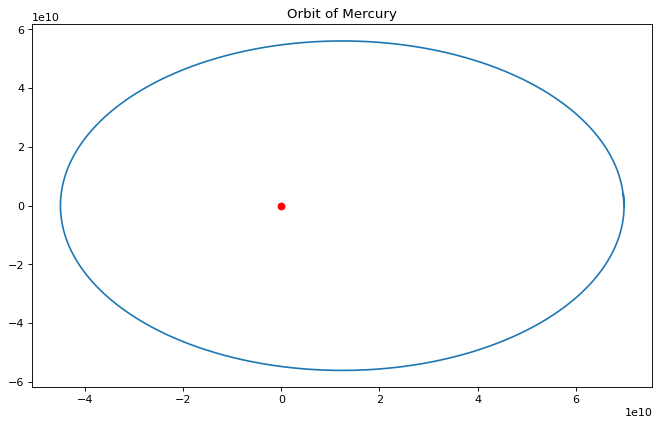

In [19]:
positions = np.array(merc_pos_hist)                                     # To make it easier to retrive the right numbers

plt.figure(figsize = (10,6), dpi = 80)

plt.plot(positions[:,0], positions[:,1], label = "Mercury")             # Position of Mercury
plt.scatter([sun[0][0]], [sun[0][1]], color = 'r', label = "Sun")       # Position of the Sun

plt.title("Orbit of Mercury")
plt.show()

We can also plot out the change in positions with time.

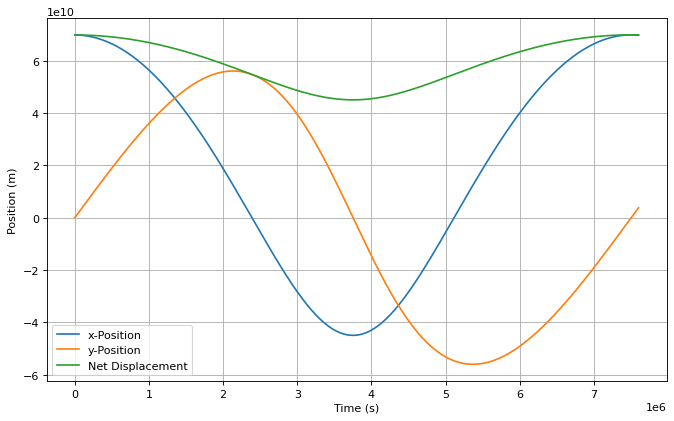

In [20]:
plt.figure(figsize = (10,6), dpi = 80)

plt.plot(time[:-1], positions[:,0], label = "x-Position")
plt.plot(time[:-1], positions[:,1], label = "y-Position")
plt.plot(time[:-1], np.sqrt(positions[:,0]**2 +  positions[:,1]**2), label = "Net Displacement")

plt.ylabel("Position (m)")
plt.xlabel("Time (s)")
plt.legend()
plt.grid()

plt.show()

How long does it take to make one orbit around the sun? Looking at the graph, we can see that one way to find out is to determine what is the time when the y-position goes from negative to positive. We can do this by running a loop over the positions, and keeping track of this change.

In [16]:
prev_ypos = 0                                           # To keep track of the previous value
index = 0                                               # To keep track of the location where it meets the criteria

y_positions = list(positions[:,1])

for i in range(len(y_positions)):                       # Iterating over the y positions
    ypos = y_positions[i]                               # The y position
    if ypos > 0 and prev_ypos < 0:                      # If the previous value is <0 and the current one > 0
        index = i                                       # Save this number
        break                                           # Break out of the loop
    
    prev_ypos = ypos                                    # If it didn't meet the criteria, update the current position as the previous and continue searching

period = time[index]                                    # The period will then be the time at which the criteria is met

print(period)

7505460


This is currently in seconds. To change it to days, we can just divide:

In [17]:
period = period/60/60/24

print ("The orbital period of Mercury is roughly " + str(period) + " days.")

The orbital period of Mercury is roughly 86.86874999999999 days.


# Possible Extensions



*   How will the velocity change with time? What about acceleration?
*   What happens if we change the time step? What is the deviation from the actual value of the orbital period?
*   Does this model work equally well for other planets?
*   What happens if there are more planets?
*   Try changing the value of the Gravitational Constant. What happens then?
*   What if the force of gravity does not follow an inverse square law?

